# About Dataset;

This datasets is related to red variants of the Portuguese "Vinho Verde" wine.The dataset describes the amount of various chemicals present in wine and their effect on it's quality. The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).Your task is to predict the quality of wine using the given data.

A simple yet challenging project, to anticipate the quality of wine.
The complexity arises due to the fact that the dataset has fewer samples, & is highly imbalanced.
Can you overcome these obstacles & build a good predictive model to classify them?

This data frame contains the following columns:

Input variables (based on physicochemical tests):\

1 - fixed acidity\

2 - volatile acidity\

3 - citric acid\

4 - residual sugar\

5 - chlorides\

6 - free sulfur dioxide\

7 - total sulfur dioxide\

8 - density\

9 - pH\

10 - sulphates\

11 - alcohol\
Output variable (based on sensory data):\

12 - quality (score between 0 and 10)

if the quality is 0 that means the prediction is not good

if is 1 that means goood

# work flow

-wine data

-data analysis

-data pre processing

-train test split

-use 0ne classification Algorithms (Random Forest model)

we then feed the new data into the Trained Random Forest model so it can predict the Quality of the wine

# importing the dependencies

In [1]:
import numpy as np
import pandas as pd  




# Data collection

In [2]:
#we loading the dataframe to pandas dataframe
wine_dataset = pd.read_csv("WineQT.csv") 


In [3]:
#checking the head
wine_dataset.head()

#using this data,  it should predict the quality of the wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [36]:
wine_dataset.head(60)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.580,0.08,1.80,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


note:
we will be training our machine learning model with this data and it should give us the quality of the wine

In [4]:
#checking the number of rows and coloums
wine_dataset.shape

(1143, 13)

In [5]:
#checking for missing values
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

# data analysis and visulaization

In [6]:
#satiscal measures of the dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [7]:
#lets check the number of points  for each quality (we are making use of the seaborn)

In [8]:
import seaborn as sns 

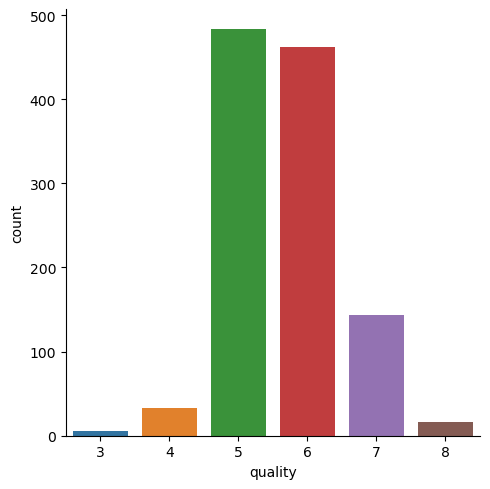

In [9]:
sns.catplot(x='quality', data = wine_dataset, kind ='count')

# lets just compare anyrandom coloums

In [10]:
# volotie acidity vs quality   (here we are comparing to know the relationship between them)

In [11]:
import matplotlib.pyplot as plt 

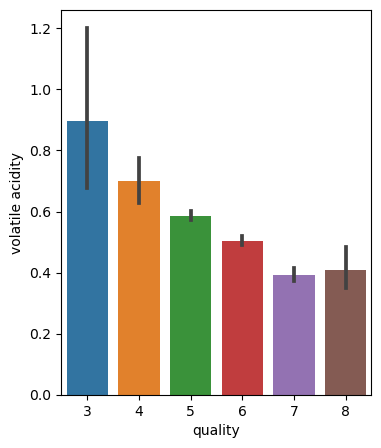

In [12]:
# volotie acidity vs quality
plot = plt.figure(figsize=(4,5))
sns.barplot(x= 'quality', y= 'volatile acidity', data = wine_dataset);

In [13]:
#as you can see if the volatile acidity is high, 
#  then the quality of the wine is less


#if the quality is high then the volatile acidity will be low

#they are inversile proposional to each other

<Axes: xlabel='quality', ylabel='citric acid'>

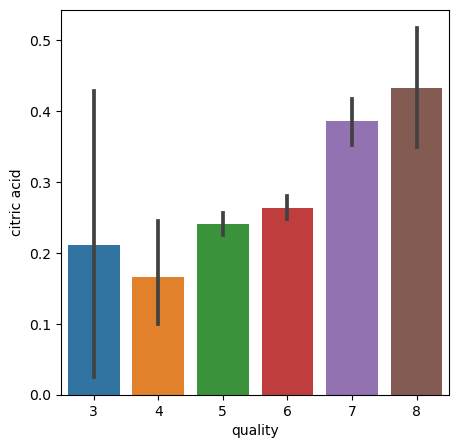

In [14]:

# "citric acid acidity"    vs "quality "
plot = plt.figure(figsize=(5,5))
sns.barplot(x= 'quality', y= 'citric acid', data = wine_dataset)

In [15]:
#this is opposite to our first graph

#here if the "citric acid" is high then we are having high  Quality  of Wine

#if the citric acid is low then quality will be low



# You can use others to test the quality of the wine 

# correlation

In [16]:
correlation = wine_dataset.corr()

<Axes: >

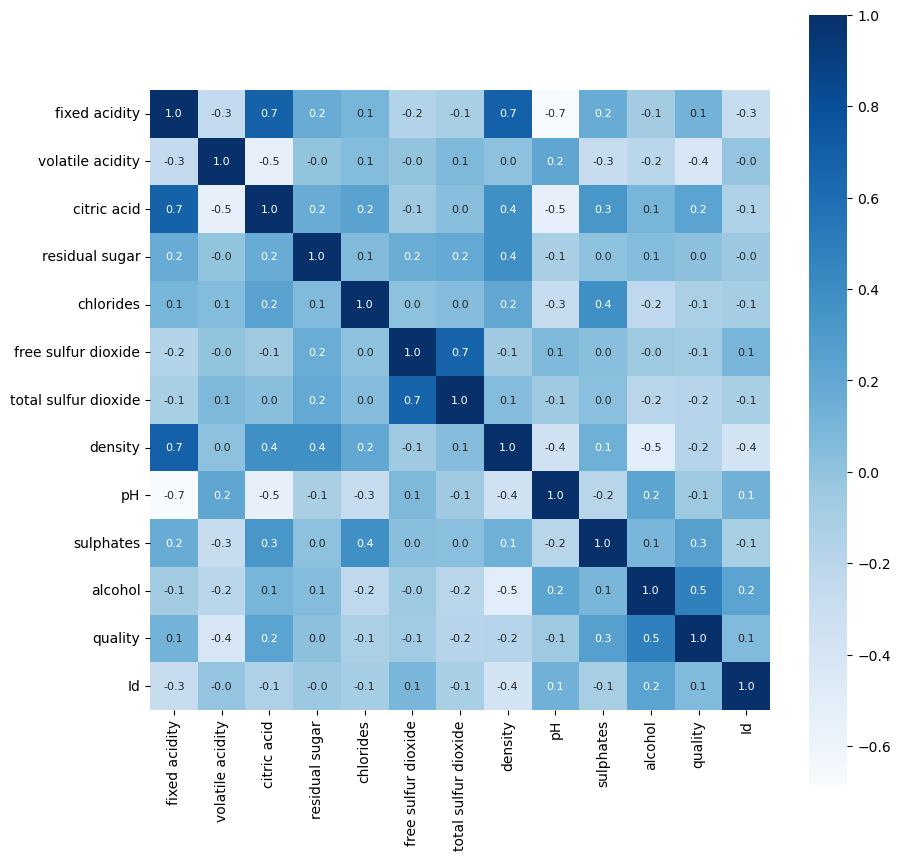

In [17]:
#constructing a heatmap to understand the correlation
plt.figure(figsize = (10,10))

sns.heatmap(correlation, cbar=True, square= True, fmt = '.1f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

# data preprocessing 

In [18]:
#we will be dropping two coloumns    
X = wine_dataset.drop(['quality', "Id"], axis=1)  


In [19]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  

In [20]:
Y = wine_dataset['quality'] #we need to replace the values with a lambda funtion

In [21]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)   #lambda to replace the values

In [22]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1138    0
1139    0
1140    0
1141    0
1142    0
Name: quality, Length: 1143, dtype: int64


# Training and testing dataset

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [24]:
print(Y.shape, Y_train.shape, Y_test.shape)

(1143,) (914,) (229,)


# Model training
we are using random forest model


In [25]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

In [26]:
#fitting our data
model.fit(X_train, Y_train)

RandomForestClassifier()

# model evaluation

model accuracy

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
X_test_prediction = model.predict(X_test)

In [29]:
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [30]:
print ('Accuracy:', test_data_accuracy)

Accuracy: 0.9126637554585153


# building a predictive system

In [31]:
inpute_data = (7.9,0.43,0.21,1.6,0.106,10.0,37.0,0.9966,3.17,0.91,9.5)

In [32]:
#changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(inpute_data)

In [33]:
#reshape the data as we are predicting the label for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [34]:
prediction = model.predict(input_data_reshaped)

C:\Users\user\OneDrive\an\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [35]:
print(prediction)

[0]
